# Project: Investigate a Dataset (No Show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
    <li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I've always had the perception that most patients who don't show up for their appointments are little children since they can't go alone and their show up depends on their parents and their situations, but to find out the true variable that affects on whether a patient is showing up for his/her appointment or what I would have to analyze a few variables, which is what I will be doing in this report. I will study the four variables age, gender, scholarship and number of days before the actual appointments on the variable showup for the appointment.

> #### Context and Content
> I've chosen the Medical Appointments No Shows dataset where the context in this dataset is that a person doesn't show up at a doctor's appointment after receiving instructions. It contains 110,527 medical appointments associated with 14 variables (characteristics).

>#### Data Dictionary
> <ol><li>PatientId: Identification of a patient.</li><li>AppointmentID: Identification of each appointment.</li><li>Gender: Male or Female. Female is the greater proportion, woman takes way more care of they health in    comparison to man.</li><li>ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.</li><li>AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.</li><li>Age: How old is the patient.</li><li>Neighbourhood: Where the appointment takes place (location of the hospital).</li><li>Scholarship: Indicates whether or not the patient is enrolled in Brasilian welfare program.</li><li>Hipertension: True or False.</li><li>Diabetes: True or False.</li><li>Alcoholism: True or False.</li><li>Handcap: True or False.</li><li>SMS_received: 1 or more messages sent to the patient.</li><li>No-show: True (for no-showup) or False (for showingup).</li></ol>

In [1]:
#import packages' statements
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load the data
df = pd.read_csv('KaggleV2-May-2016.csv')

In [3]:
# Print first 20 rows to explore the data
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
# Print 20 last rows to explore the data
df.tail(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110517,5.574942e+12,5780122,F,2016-06-07T07:38:34Z,2016-06-07T00:00:00Z,19,MARIA ORTIZ,0,0,0,0,0,0,No
110518,7.263315e+13,5630375,F,2016-04-27T15:15:06Z,2016-06-07T00:00:00Z,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,6.542388e+13,5630447,F,2016-04-27T15:23:14Z,2016-06-07T00:00:00Z,22,MARIA ORTIZ,0,0,0,0,0,1,No
110520,9.969977e+14,5650534,F,2016-05-03T07:51:47Z,2016-06-07T00:00:00Z,42,MARIA ORTIZ,0,0,0,0,0,1,No
110521,3.635534e+13,5651072,F,2016-05-03T08:23:40Z,2016-06-07T00:00:00Z,53,MARIA ORTIZ,0,0,0,0,0,1,No
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [5]:
# Displaying entries and columns
df.shape 

(110527, 14)

In [6]:
# Checking datatypes, missing values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [229]:
# Check for duplicates
sum(df.duplicated()) 

0

In [230]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


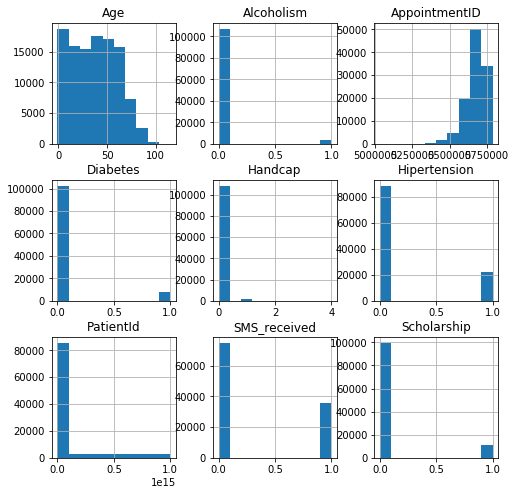

In [231]:
# plotting - initial look
df.hist(figsize=(8,8)); 

> After exploring the dataset, I have noticed the following:
><ol><li>Dates are in string datatypes.</li><li>Some ages are in zeroe and minuse values, here I considered zeroe values as less than a year age (months).</li></ol>

### Data Cleaning (Replace this with more specific notes!)

In [232]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

In [233]:
# Converting strings to datetime datatype
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: x.date()) # I used this function to keep the date only

In [234]:
# Converting strings to datetime datatype
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']) 
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: x.date()) # I used this function to keep the date only

In [235]:
# I've dropped the following columns since I'm not using them and it would ease my exploration during my analysis
df.drop(['PatientId','AppointmentID','Neighbourhood','Alcoholism','Diabetes','Handcap','SMS_received'],axis=1, inplace = True) 

In [236]:
# Here, I dropped rows with minus values in the age column
# Also, I considered zero values in age column as less than year age
invalid_age = df[df['Age'] < 0].index
df.drop(invalid_age, inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

In [237]:
# counting number of patients who showed up for their appointments
showed_up = df['No-show'] == 'No'

In [238]:
# counting number of patients who didn't show up for their appointments
didntshow_up = df['No-show'] == 'Yes'

### Research Question 1 (Does knowing the age of a patient helps us predicting whether or not he/she will show up for the scheduled appointment?)

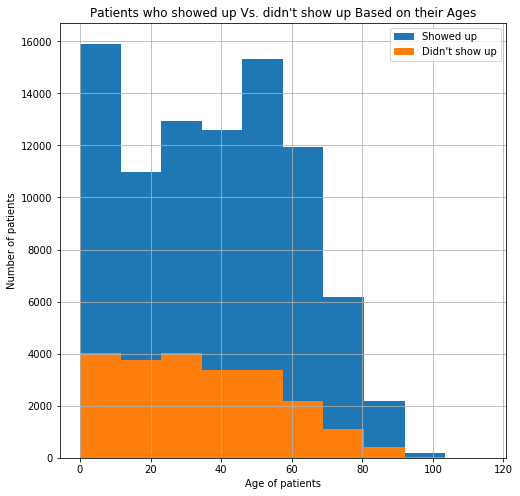

In [239]:
# Visualizing the number and age of patients who showed/didntshow up
plt.figure(figsize=(8,8)) # Adjusting figure size
plt.hist(df.Age[showed_up], label = 'Showed up', alpha=1) # Plotting ages based on showingup
plt.hist(df.Age[didntshow_up], label = 'Didn\'t show up', alpha=1) # Plotting ages based on not showingup
plt.title('Patients who showed up Vs. didn\'t show up Based on their Ages') # Setting title
plt.grid(b = True, axis = 'both') # Enabling grid lines for better visualization
plt.legend() # Displaying legends
plt.xlabel('Age of patients') # Labeling xaxis
plt.ylabel('Number of patients'); # Labeling yaxis

> As it's shown in the figure, the majority number of patients who didn't show up for their appointments are approximately of the age 0-35 

### Research Question 2  (Does knowing the gender of a patient helps us predicting whether or not the patient will show up for the scheduled appointment?)

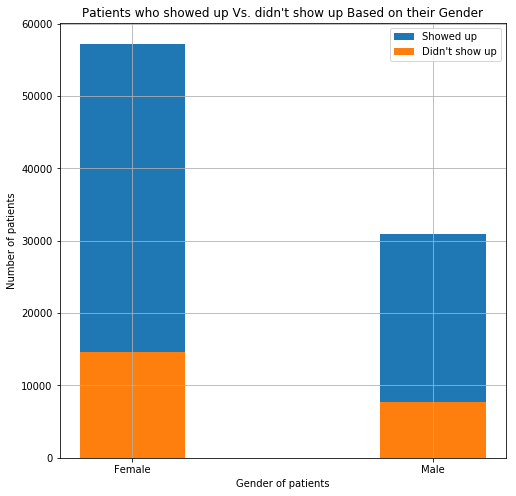

In [240]:
# Visualizing the number and gender of patients who showed/didntshow up
plt.figure(figsize=(8,8)) # Adjusting figure size
plt.bar(np.arange(2),df.Gender[showed_up].value_counts(),0.35, label = 'Showed up', alpha=1) # Plotting genders based on showingup
plt.bar(np.arange(2),df.Gender[didntshow_up].value_counts(),0.35, label = 'Didn\'t show up', alpha=1) # Plotting genders based on not showingup
plt.title('Patients who showed up Vs. didn\'t show up Based on their Gender') # Setting title
plt.grid(b = True, axis = 'both') # Enabling grid lines for better visualization
plt.legend() # Displaying legends
plt.xticks(np.arange(2),('Female','Male')) # Naming the bars
plt.xlabel('Gender of patients') # Labeling xaxis
plt.ylabel('Number of patients'); # Labeling yaxis

> The above figure shows that the majority of patients are females.

### Research Question 3  (Does knowing if a patient has a scholarship helps us predicting whether or not the patient will show up for the scheduled appointment?)

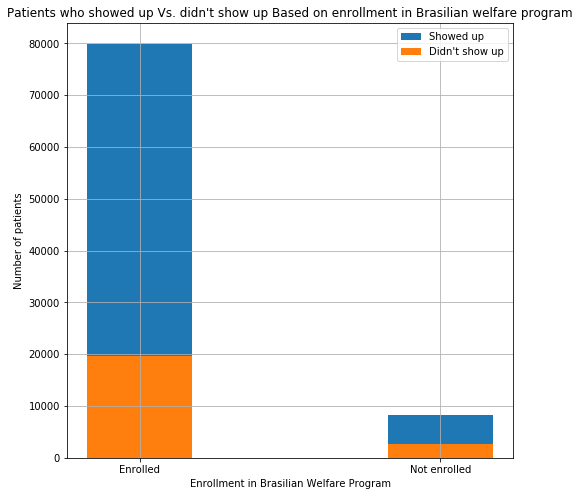

In [241]:
# Visualizing the number and gender of patients who showed/didntshow up
plt.figure(figsize=(8,8)) # Adjusting figure size
plt.bar(np.arange(2),df.Scholarship[showed_up].value_counts(),0.35, label = 'Showed up', alpha=1)  # Plotting Scholarship based on showingup
plt.bar(np.arange(2),df.Scholarship[didntshow_up].value_counts(),0.35, label = 'Didn\'t show up', alpha=1) # Plotting Scholarship based on not showingup
plt.title('Patients who showed up Vs. didn\'t show up Based on enrollment in Brasilian welfare program') # Setting title
plt.grid(b = True, axis = 'both') # Enabling grid lines for better visualization
plt.legend() # Displaying legends
plt.xticks(np.arange(2),('Enrolled','Not enrolled'))  # Naming the bars
plt.xlabel('Enrollment in Brasilian Welfare Program') # Labeling xaxis
plt.ylabel('Number of patients'); # Labeling yaxis

> The above figure illustrates that the patients who are enrolled in Brasilian Welfare Program are most likely to schedule appointments and don't show up.

### Research Question 4  (Does knowing the period between appointment's setup date and the actual date helps us predicting whether or not patients will show up for their scheduled appointments?)

In [242]:
# Counting number of days between setting up the appointment and the actual day
df['Days_before_appoint'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days 

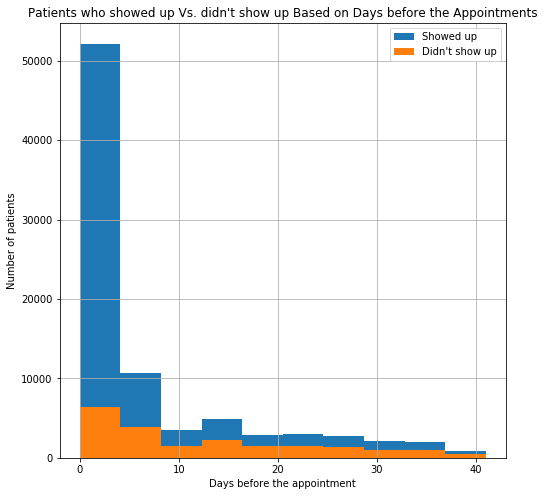

In [243]:
plt.figure(figsize=(8,8)) # Adjusting figure size
plt.hist(df.Days_before_appoint[showed_up], alpha = 1, range = (0,41) , label = 'Showed up') # Plotting number of days before the appointment based on showing up
plt.hist(df.Days_before_appoint[didntshow_up], alpha=1, range = (0,41), label = 'Didn\'t show up') # Plotting number of days before the appointment based on not showing up
plt.title('Patients who showed up Vs. didn\'t show up Based on Days before the Appointments') # Setting title
plt.grid(b = True, axis = 'both') # Enabling grid lines for better visualization
plt.legend() # Displaying legends
plt.xlabel('Days before the appointment') #  # Labeling xaxis
plt.ylabel('Number of patients'); # Labeling yaxis

> We can see in the above figure that the patient which schedule an appointment before several days of the actual appointment day appear to miss the appointment.

<a id='conclusions'></a>
## Limitations 

> During my exploration of this dataset, I have faced some problems that are disturbing and considered as limitations such as some erroneous datatypes and not enough descriptions. PatientId column is found to be float when usually IDs are integers. Also, the age column has minus values which indicates that it was either not collected correctly or it was collected with a specific purpose but we haven't been provided with enough details to understand. In addition, in my openion if we have been provided with a detailed description of these indicators (Hipertension, Diabetes, Alcoholism, Handcap) we may have been able to analyze the data and find more reasons on why patients don't show up for their appointments.

## Conclusions

> To conclude, after exploring this dataset that contains over 100,000 medical records and study the relationship between four independent variables age, gender, scholarship and number of days before the scheduled day and the dependandt variable showup, I came to the results that neither one of the four variables has a strong affect on the variable showup.

In [7]:
# Saving the report
df.to_csv('No-showAppointment')

In [8]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

<a id='references'></a>
## References 
> Please note that I have used these resources during my work on the project:
> <ol><li><a href="https://s3.amazonaws.com/video.udacity-data.com/topher/2018/July/5b57919a_data-set-options/data-set-options.pdf">Datasets</a>, <a href="https://www.kaggle.com/joniarroba/noshowappointments">NoShowAppointments</a></li><li><a href="https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/">Python Pandas: How to drop rows by conditions</a></li><li><a href="https://matplotlib.org/gallery/index.html">Matplot Tutorials</a></li><li><a href="https://stackoverflow.com/questions/24614751/pandas-dataframe-convert-string-to-data-without-time">Convert strings to date without time</a></li>
</ol>